In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

[{'x': 141.2510597701058, 'y': 385.1783576906479, 'color': '#ff7f0e', 'label': 'b'}, {'x': 120.78735139408656, 'y': 391.7510037194264, 'color': '#ff7f0e', 'label': 'b'}, {'x': 130.35107734897753, 'y': 411.3952270022793, 'color': '#ff7f0e', 'label': 'b'}, {'x': 137.14067518678883, 'y': 381.56789510935386, 'color': '#ff7f0e', 'label': 'b'}, {'x': 160.13601975643957, 'y': 387.96998482206965, 'color': '#ff7f0e', 'label': 'b'}, {'x': 195.72198397015262, 'y': 405.9202600810347, 'color': '#ff7f0e', 'label': 'b'}, {'x': 228.96876439950407, 'y': 416.7749129729235, 'color': '#ff7f0e', 'label': 'b'}, {'x': 261.22282700311285, 'y': 389.1326642170293, 'color': '#ff7f0e', 'label': 'b'}, {'x': 297.58044223033977, 'y': 420.13879770913854, 'color': '#ff7f0e', 'label': 'b'}, {'x': 342.5365318541625, 'y': 390.0281933062544, 'color': '#ff7f0e', 'label': 'b'}, {'x': 374.31745189870577, 'y': 390.99078601430375, 'color': '#ff7f0e', 'label': 'b'}, {'x': 402.6377510318615, 'y': 418.38020702777993, 'color': '#f

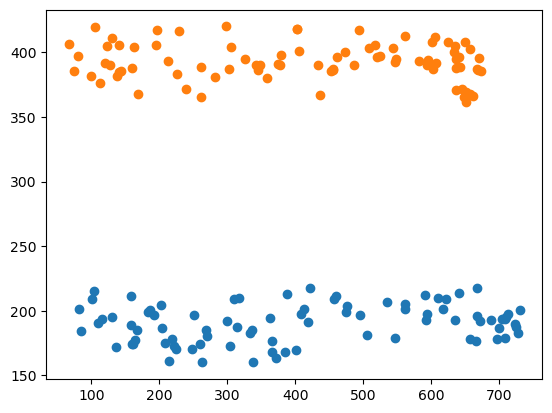

(84, 2)
(84, 2)


In [148]:
print(widget.data)

x_1 = [widget.data[i]['x'] for i in range(len(widget.data)) if widget.data[i]['label'] == 'a']
y_1 = [widget.data[i]['y'] for i in range(len(widget.data)) if widget.data[i]['label'] == 'a']
x_2 = [widget.data[i]['x'] for i in range(len(widget.data)) if widget.data[i]['label'] == 'b']
y_2 = [widget.data[i]['y'] for i in range(len(widget.data)) if widget.data[i]['label'] == 'b']

plt.plot(x_1, y_1, 'o')
plt.plot(x_2, y_2, 'o')
plt.show()

data_1 = np.array([x_1, y_1]).T
data_2 = np.array([x_2, y_2]).T

print(data_1.shape)
print(data_2.shape)

Standard PCA on each dataset

[[ 0.99989831 -0.01426096]
 [ 0.01426096  0.99989831]]
0.9999999999999999
0.9999999999999999
[[ 0.99996838  0.00795278]
 [-0.00795278  0.99996838]]
0.9999999999999999
0.9999999999999999
[43287.9095609    210.24240631]
[39855.72973846   199.40238799]


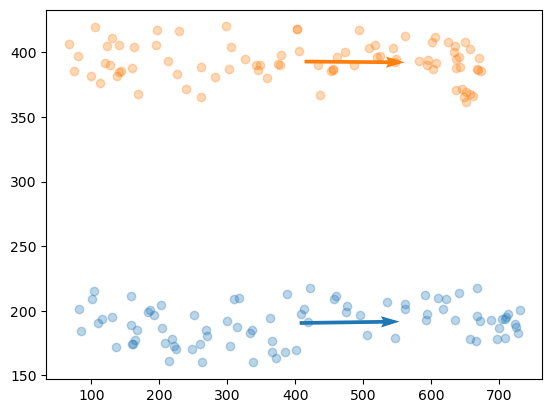

In [149]:
def PCA(data, n_components):
    data = np.array(data)
    data = data - np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    eig_values, eig_vectors = np.linalg.eig(cov)
    idx = np.argsort(-eig_values)
    eig_vectors = eig_vectors[:, idx]
    eig_values = eig_values[idx]
    return np.dot(data, eig_vectors[:, :n_components]), eig_vectors[:, :n_components], eig_values

data_1_pca, eig_vectors_1, eig_values_1 = PCA(data_1, 2)
data_2_pca, eig_vectors_2, eig_values_2 = PCA(data_2, 2)

print(eig_vectors_1)
print(np.linalg.norm(eig_vectors_1[:, 0]))
print(np.linalg.norm(eig_vectors_1[:, 1]))
print(eig_vectors_2)
print(np.linalg.norm(eig_vectors_2[:, 0]))
print(np.linalg.norm(eig_vectors_2[:, 1]))

print(eig_values_1)
print(eig_values_2)

# plot arrows showing the direction of the principal components
plt.plot(x_1, y_1, 'o', alpha=0.3, color='tab:blue')
plt.quiver(np.mean(data_1[:, 0]), np.mean(data_1[:, 1]), eig_vectors_1[0, 0], eig_vectors_1[1, 0], scale=1, scale_units='inches', color='tab:blue')
# plt.quiver(np.mean(data_1[:, 0]), np.mean(data_1[:, 1]), eig_vectors_1[0, 1], eig_vectors_1[1, 1], scale=1, scale_units='inches', color='tab:blue')

plt.plot(x_2, y_2, 'o', alpha=0.3, color='tab:orange')
plt.quiver(np.mean(data_2[:, 0]), np.mean(data_2[:, 1]), eig_vectors_2[0, 0], eig_vectors_2[1, 0], scale=1, scale_units='inches', color='tab:orange')
# plt.quiver(np.mean(data_2[:, 0]), np.mean(data_2[:, 1]), eig_vectors_2[0, 1], eig_vectors_2[1, 1], scale=1, scale_units='inches', color='tab:orange')
plt.show()

Simple PCA using numerical optimisation

initial guess: [-0.6868784   0.72677236]
result: [-0.99989831 -0.01426096] with norm 0.9999999999999999
[[-0.6868784   0.72677236]
 [-0.68687839  0.72677237]
 [-0.68687839  0.72677237]
 [-0.99973001  0.02323587]
 [-0.99973001  0.02323587]
 [-0.99973001  0.02323588]
 [ 0.6284308  -0.7778655 ]
 [ 0.6284308  -0.7778655 ]
 [ 0.6284308  -0.7778655 ]
 [ 0.40648363 -0.91365807]
 [ 0.40648363 -0.91365806]
 [ 0.40648363 -0.91365807]
 [-0.99906046 -0.04333828]
 [-0.99906046 -0.04333828]
 [-0.99906046 -0.04333827]
 [-0.99970628 -0.02423522]
 [-0.99970628 -0.02423522]
 [-0.99970628 -0.02423521]
 [-0.99988802 -0.01496497]
 [-0.99988802 -0.01496497]
 [-0.99988802 -0.01496496]
 [-0.99989806 -0.01427843]
 [-0.99989806 -0.01427843]
 [-0.99989806 -0.01427842]
 [-0.99989831 -0.014261  ]
 [-0.99989831 -0.014261  ]
 [-0.99989831 -0.01426099]
 [-0.99989831 -0.01426097]
 [-0.99989831 -0.01426097]
 [-0.99989831 -0.01426096]
 [-0.99989831 -0.01426096]
 [-0.99989831 -0.01426096]
 [-0.99989831 -0.01426095]]


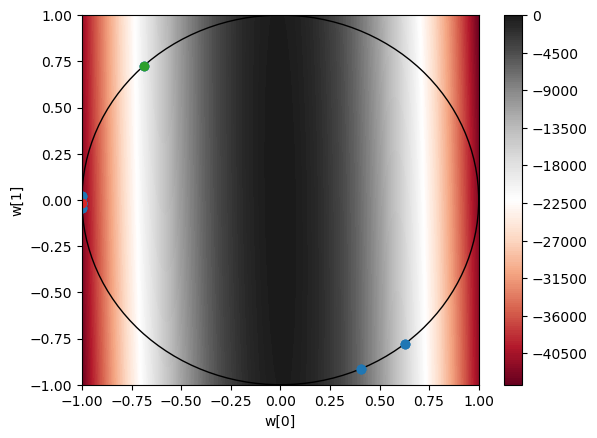

In [150]:

def my_PCA(X, n_components = 1):
    result_history = []
    X = np.array(X)
    X = X - np.mean(X, axis=0)
    
    p_1 = X.shape[1] # dimensionality of data_1

    def standard_objective(w, X):
        w = w / np.linalg.norm(w)
        result_history.append(w)
        term1 = np.var(np.dot(X, w))
        return -(term1)

    # Initial guess - random unit vector
    np.random.seed(13)  # For reproducibility
    w0 = np.random.randn(p_1)
    w0 /= np.linalg.norm(w0)

    print(f'initial guess: {w0}')

    res = minimize(standard_objective, w0, args=(X))
    w = res.x
    w = w / np.linalg.norm(w)
    result_history = np.array(result_history)
    return w, result_history

w_opt, result_history = my_PCA(data_1)

print(f'result: {w_opt} with norm {np.linalg.norm(w_opt)}')
print(result_history)

def standard_objective(w, X):
    term1 = np.var(np.dot(X, w)) 
    return -(term1)

# try all possible values of w_1 and w_2, plot the objective function
w_0 = np.linspace(-1, 1, 100)
w_1 = np.linspace(-1, 1, 100)
w_0_mesh, w_1_mesh = np.meshgrid(w_0, w_1)
Z = np.zeros((100, 100))
for i, wi in enumerate(w_0):
    for j, wj in enumerate(w_1):
        w = np.array([wi, wj])
        # print(w)
        Z[i, j] = standard_objective(w, data_1 - np.mean(data_1, axis=0))

fig, ax = plt.subplots()
im = ax.contourf(w_1_mesh, w_0_mesh, Z, 200, cmap='RdGy')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
circ = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circ)
ax.plot(result_history[1:-1, 0], result_history[1:-1, 1], 'o', color='tab:blue', alpha=1)
ax.plot(result_history[0, 0], result_history[0, 1], 'o', color='tab:green', alpha=1)
ax.plot(result_history[-1, 0], result_history[-1, 1], 'o', color='tab:red', alpha=1)
fig.colorbar(im, ax=ax)

full joint PCA

initial guess: [ 0.71531976  0.69879728  0.98924547 -0.14626483]
number of iterations: 300
result: [ 0.9996626   0.02597485  0.99995375 -0.00961804] with norms 1.0 and 0.9999999999999999
np.var(np.dot(X_1, w_1)) = 42766.73459973999
np.var(np.dot(X_2, w_2)) = 39381.14809498583
2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1] = 3485008.718583981
[[ 0.71531976  0.69879728  0.98924547 -0.14626483]
 [ 0.71531977  0.69879727  0.98924547 -0.14626483]
 [ 0.71531976  0.69879729  0.98924547 -0.14626483]
 ...
 [ 0.9996626   0.02597485  0.99995375 -0.00961802]
 [ 0.9996626   0.02597485  0.99995375 -0.00961804]
 [ 0.9996626   0.02597485  0.99995375 -0.00961804]]


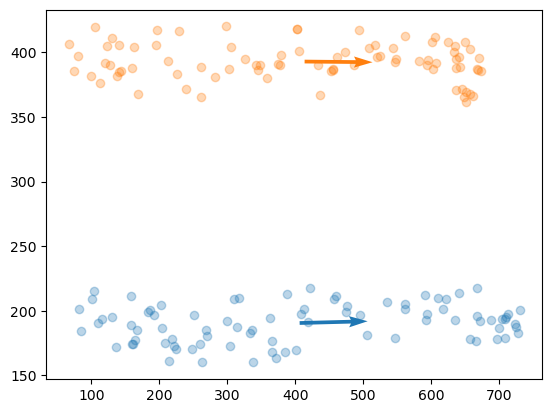

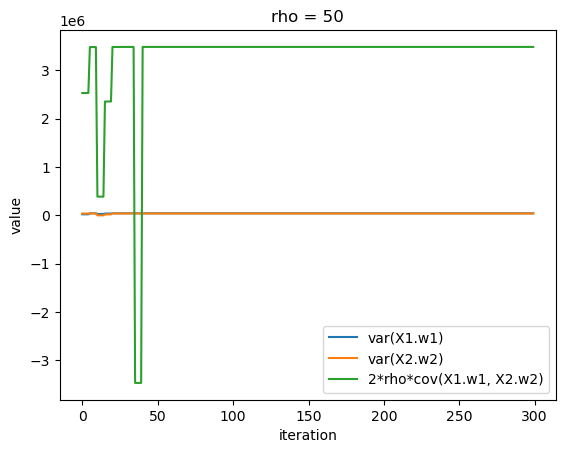

(84, 300)
(300,)
(300,)
(300,)


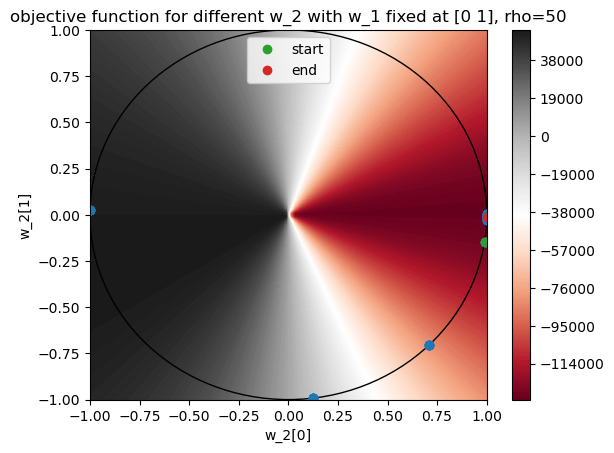

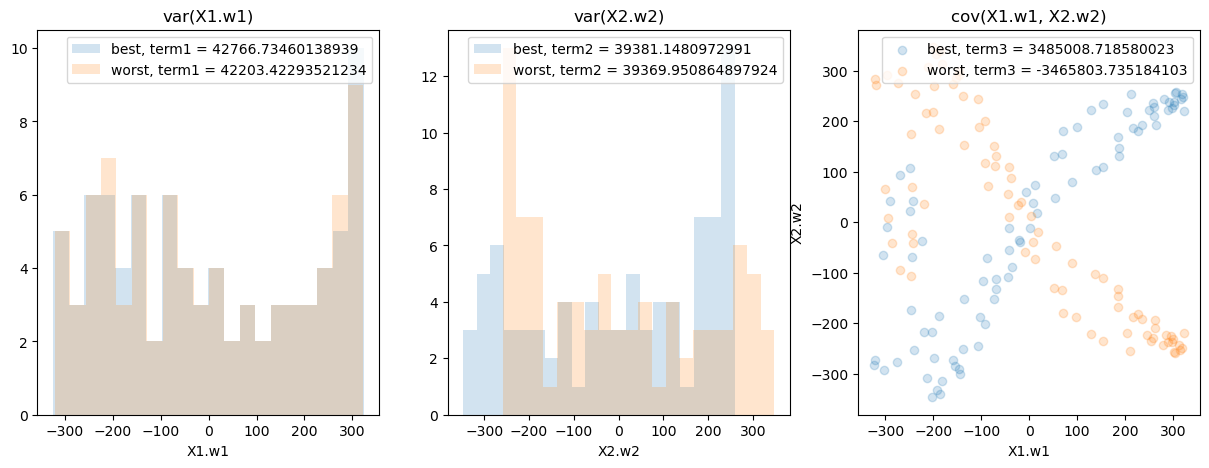

In [152]:
def my_joint_PCA(X_1, X_2, rho = 0, n_components = 1):
    result_history = []
    term_history = []
    X_1 = np.array(X_1)
    X_1 = X_1 - np.mean(X_1, axis=0)
    X_2 = np.array(X_2)
    X_2 = X_2 - np.mean(X_2, axis=0)
    
    p_1 = X_1.shape[1] # dimensionality of data_1
    p_2 = X_2.shape[1] # dimensionality of data_2

    def joint_objective(w, X_1, X_2, rho):
        w_1 = w[:p_1]
        w_2 = w[p_1:]

        w_1 = w_1 / np.linalg.norm(w_1)
        w_2 = w_2 / np.linalg.norm(w_2)

        result_history.append(np.concatenate((w_1, w_2)))
        
        term1 = np.var(np.dot(X_1, w_1))
        term2 = np.var(np.dot(X_2, w_2))
        term3 = 2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1]

        # print(f'term1: {term1}, term2: {term2}, term3: {term3}')

        term_history.append([term1, term2, term3])

        return -(term1 + term2 + term3)

    # Initial guess - random unit vector
    np.random.seed(137)  # For reproducibility
    w0_1 = np.random.randn(p_1)
    w0_1 /= np.linalg.norm(w0_1)

    w0_2 = np.random.randn(p_2)
    w0_2 /= np.linalg.norm(w0_2)

    w0 = np.concatenate((w0_1, w0_2))
    print(f'initial guess: {w0}')

    res = minimize(joint_objective, w0, args=(X_1, X_2, rho))
    w = res.x
    w_1 = w[:p_1]
    w_2 = w[p_1:]
    w_1 = w_1 / np.linalg.norm(w_1)
    w_2 = w_2 / np.linalg.norm(w_2)
    w = np.concatenate((w_1, w_2))

    result_history = np.array(result_history)
    term_history = np.array(term_history)
    return w, result_history, term_history

# parameter
rho = 50
###########

p_1, p_2 = data_1.shape[1], data_2.shape[1]

w_opt, result_history, term_history = my_joint_PCA(data_1, data_2, rho = rho)

w_1_opt = w_opt[:p_1]
w_2_opt = w_opt[p_1:]

print(f'number of iterations: {result_history.shape[0]}')
print(f'result: {w_opt} with norms {np.linalg.norm(w_1_opt)} and {np.linalg.norm(w_2_opt)}')
print(f'np.var(np.dot(X_1, w_1)) = {np.var(np.dot(data_1, w_1_opt))}')
print(f'np.var(np.dot(X_2, w_2)) = {np.var(np.dot(data_2, w_2_opt))}')
print(f'2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1] = {2 * rho * np.cov(np.dot(data_1, w_1_opt), np.dot(data_2, w_2_opt))[0, 1]}')
# print(np.linalg.norm(result_history[:, :p_1], axis=1), np.linalg.norm(result_history[:, p_1:], axis=1))
print(result_history)

# plot the first PCA components indentified by the joint PCA
plt.scatter(x_1, y_1, alpha=0.3, color='tab:blue')
plt.quiver(np.mean(data_1[:, 0]), np.mean(data_1[:, 1]), w_1_opt[0], w_1_opt[1], scale=0.01, scale_units='xy', color='tab:blue')

plt.scatter(x_2, y_2, alpha=0.3, color='tab:orange')
plt.quiver(np.mean(data_2[:, 0]), np.mean(data_2[:, 1]), w_2_opt[0], w_2_opt[1], scale=0.01, scale_units='xy', color='tab:orange')
plt.show()

# plot the three different terms throughout the optimization
fig, ax = plt.subplots()
ax.plot(term_history[:, 0], label='var(X1.w1)')
ax.plot(term_history[:, 1], label='var(X2.w2)')
ax.plot(term_history[:, 2], label='2*rho*cov(X1.w1, X2.w2)')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('value')
ax.set_title(f'rho = {rho}')
plt.show()

def joint_objective(w, X_1, X_2, rho):
    w_1 = w[:p_1]
    w_2 = w[p_1:]

    w_1 = w_1 / np.linalg.norm(w_1)
    w_2 = w_2 / np.linalg.norm(w_2)
    
    term1 = np.var(np.dot(X_1, w_1))
    term2 = np.var(np.dot(X_2, w_2))
    term3 = 2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1]

    return -(term1 + term2 + term3)

# fix w_1 #######################
w_1_fixed = np.array([0, 1])
#################################

# try all possible values of w_2, plot the objective function
w_2_0 = np.linspace(-1, 1, 100)
w_2_1 = np.linspace(-1, 1, 100)
w_2_0_mesh, w_2_1_mesh = np.meshgrid(w_2_0, w_2_1)
Z = np.zeros((100, 100))
for i, wi in enumerate(w_2_0):
    for j, wj in enumerate(w_2_1):
        w = np.array([w_1_fixed[0], w_1_fixed[1], wi, wj])
        # print(w)
        Z[i, j] = joint_objective(w, data_1 - np.mean(data_1, axis=0), data_2 - np.mean(data_2, axis=0), rho)

fig, ax = plt.subplots()
im = ax.contourf(w_2_1_mesh, w_2_0_mesh, Z, 200, cmap='RdGy')
ax.set_xlabel('w_2[0]')
ax.set_ylabel('w_2[1]')
circ = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circ)
ax.plot(result_history[1:-1, 2], result_history[1:-1, 3], 'o', color='tab:blue', alpha=1)
ax.plot(result_history[0, 2], result_history[0, 3], 'o', color='tab:green', alpha=1, label='start')
ax.plot(result_history[-1, 2], result_history[-1, 3], 'o', color='tab:red', alpha=1, label='end')
ax.set_title(f'objective function for different w_2 with w_1 fixed at {w_1_fixed}, rho={rho}')
ax.legend()
fig.colorbar(im, ax=ax)

# plot the var_1, var_2, and cov terms throughout the optimization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
projected_data_1 = np.dot(data_1 - np.mean(data_1, axis=0), result_history[:, :p_1].T)
projected_data_2 = np.dot(data_2 - np.mean(data_2, axis=0), result_history[:, p_1:].T)

print(projected_data_1.shape)

var_X1_w1 = np.var(projected_data_1, axis = 0)
var_X2_w2 = np.var(projected_data_2, axis = 0)
cov_X1_w1_X2_w2 = np.array([np.cov(projected_data_1[:, i], projected_data_2[:, i])[0,1] for i in range(result_history.shape[0])])
objective = -(var_X1_w1 + var_X2_w2 + 2 * rho * cov_X1_w1_X2_w2)

print(var_X1_w1.shape)
print(var_X2_w2.shape)
print(cov_X1_w1_X2_w2.shape)

ax[0].hist(projected_data_1[:, np.argmin(objective)], alpha=0.2, bins=20, label = f'best, term1 = {var_X1_w1[np.argmin(objective)]}')
ax[1].hist(projected_data_2[:, np.argmin(objective)], alpha=0.2, bins=20, label = f'best, term2 = {var_X2_w2[np.argmin(objective)]}')
ax[2].scatter(projected_data_1[:, np.argmin(objective)], projected_data_2[:, np.argmin(objective)], alpha=0.2, label = f'best, term3 = {2 * rho * cov_X1_w1_X2_w2[np.argmin(objective)]}')

ax[0].hist(projected_data_1[:, np.argmax(objective)], alpha=0.2, bins=20, label = f'worst, term1 = {var_X1_w1[np.argmax(objective)]}')
ax[1].hist(projected_data_2[:, np.argmax(objective)], alpha=0.2, bins=20, label = f'worst, term2 = {var_X2_w2[np.argmax(objective)]}')
ax[2].scatter(projected_data_1[:, np.argmax(objective)], projected_data_2[:, np.argmax(objective)], alpha=0.2, label = f'worst, term3 = {2 * rho * cov_X1_w1_X2_w2[np.argmax(objective)]}')

ax[0].set_title('var(X1.w1)')
ax[0].set_xlabel('X1.w1')
ax[1].set_title('var(X2.w2)')
ax[1].set_xlabel('X2.w2')
ax[2].set_title('cov(X1.w1, X2.w2)')
ax[2].set_xlabel('X1.w1')
ax[2].set_ylabel('X2.w2')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# criss cross data
# rho = 0: [-0.99997359 -0.00726787  0.05630625  0.99841354]
# rho = 50: [-0.99983532 -0.01814726  0.11897847  0.99289683]

# not so criss cross data
# rho = 0: [0.95155215 0.30748741 0.80777634 0.58948909]
# rho = 50: [0.92812474 0.37226935 0.82195794 0.56954819]

# parallel data
# rho = 0: [ 0.99989831  0.01426095  0.99996838 -0.00795278]
# rho = 50: [ 0.9996626   0.02597485  0.99995375 -0.00961804]
    


multiple components

initial guess: [ 0.71531976  0.69879728  0.98924547 -0.14626483]
initial guess: [ 0.71531976  0.69879728  0.98924547 -0.14626483]
[[ 0.9996626   0.02597485  0.99995375 -0.00961804]
 [-0.02597485  0.9996626   0.00961799  0.99995375]]
[[array([ 0.71531976,  0.69879728,  0.98924547, -0.14626483]), array([ 0.71531977,  0.69879727,  0.98924547, -0.14626483]), array([ 0.71531976,  0.69879729,  0.98924547, -0.14626483]), array([ 0.71531976,  0.69879728,  0.98924547, -0.14626483]), array([ 0.71531976,  0.69879728,  0.98924547, -0.14626482]), array([ 0.99994037, -0.01092005,  0.9999912 ,  0.00419509]), array([ 0.99994037, -0.01092005,  0.9999912 ,  0.00419509]), array([ 0.99994037, -0.01092004,  0.9999912 ,  0.00419509]), array([ 0.99994037, -0.01092005,  0.9999912 ,  0.00419509]), array([ 0.99994037, -0.01092005,  0.9999912 ,  0.0041951 ]), array([ 0.81575021,  0.57840435,  0.12553187, -0.99208959]), array([ 0.81575021,  0.57840435,  0.12553187, -0.99208959]), array([ 0.81575021,  0.57840435, 

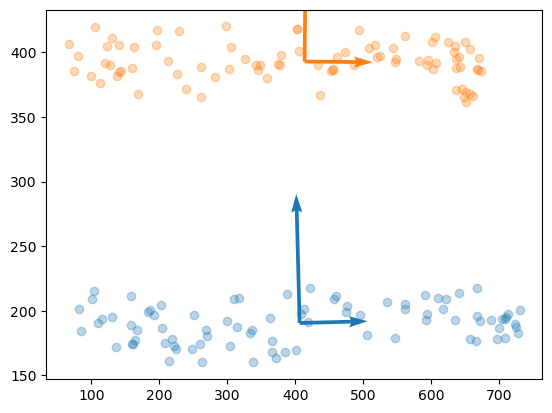

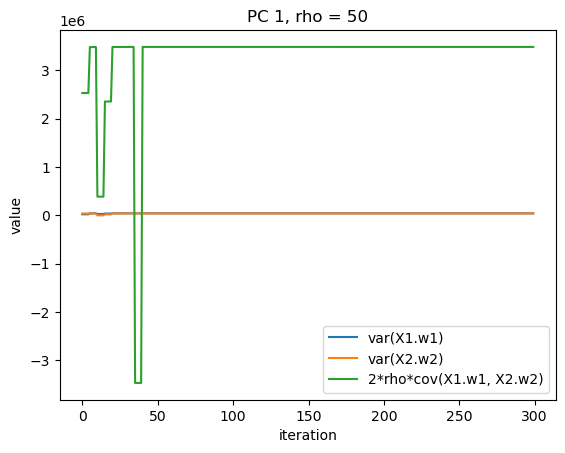

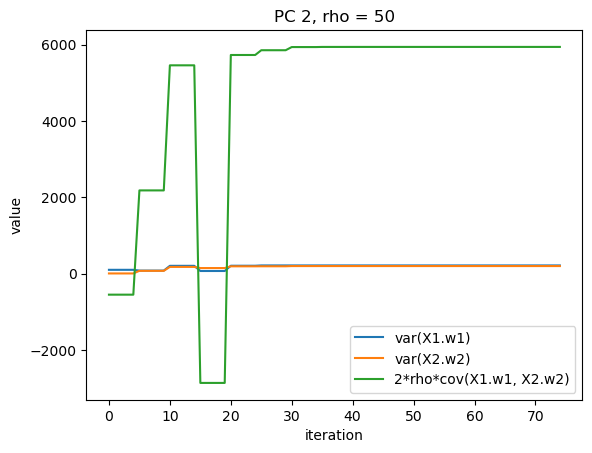

In [169]:
def my_joint_PCA(X_1, X_2, rho = 0, n_components = 1):
    result_history = []
    term_history = []
    X_1 = np.array(X_1)
    X_1 = X_1 - np.mean(X_1, axis=0)
    X_2 = np.array(X_2)
    X_2 = X_2 - np.mean(X_2, axis=0)
    
    p_1 = X_1.shape[1] # dimensionality of data_1
    p_2 = X_2.shape[1] # dimensionality of data_2

    w_full = np.zeros((n_components, p_1 + p_2)) # has shape (n_components, p_1 + p_2)

    def joint_objective(w, X_1, X_2, rho):
        w_1 = w[:p_1]
        w_2 = w[p_1:]

        w_1 = w_1 / np.linalg.norm(w_1)
        w_2 = w_2 / np.linalg.norm(w_2)

        result_history[i].append(np.concatenate((w_1, w_2)))
        
        term1 = np.var(np.dot(X_1, w_1))
        term2 = np.var(np.dot(X_2, w_2))
        term3 = 2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1]

        # print(f'term1: {term1}, term2: {term2}, term3: {term3}')

        term_history[i].append([term1, term2, term3])

        return -(term1 + term2 + term3)

    for i in range(n_components):
        result_history.append([])
        term_history.append([])

        # Initial guess - random unit vector
        np.random.seed(137)  # For reproducibility
        w0_1 = np.random.randn(p_1)
        w0_1 /= np.linalg.norm(w0_1)

        w0_2 = np.random.randn(p_2)
        w0_2 /= np.linalg.norm(w0_2)

        w0 = np.concatenate((w0_1, w0_2))
        print(f'initial guess: {w0}')

        res = minimize(joint_objective, w0, args=(X_1, X_2, rho))
        w = res.x
        w_1 = w[:p_1]
        w_2 = w[p_1:]
        w_1 = w_1 / np.linalg.norm(w_1)
        w_2 = w_2 / np.linalg.norm(w_2)
        w = np.concatenate((w_1, w_2))
        w_full[i, :] = w

        X_1 = X_1 - np.outer(np.dot(X_1, w_1), w_1)
        X_2 = X_2 - np.outer(np.dot(X_2, w_2), w_2)

    # result_history = np.array(result_history)
    # term_history = np.array(term_history)
    return w_full, result_history, term_history

# parameter
rho = 50
n_components = 2
###########

p_1, p_2 = data_1.shape[1], data_2.shape[1]

w_opt, result_history, term_history = my_joint_PCA(data_1, data_2, rho = rho, n_components = n_components)

print(w_opt)
print(result_history)
print(term_history)

# print(f'number of iterations: {result_history.shape[0]}')
# print(f'result: {w_opt} with norms {np.linalg.norm(w_1_opt)} and {np.linalg.norm(w_2_opt)}')
# print(f'np.var(np.dot(X_1, w_1)) = {np.var(np.dot(data_1, w_1_opt))}')
# print(f'np.var(np.dot(X_2, w_2)) = {np.var(np.dot(data_2, w_2_opt))}')
# print(f'2 * rho * np.cov(np.dot(X_1, w_1), np.dot(X_2, w_2))[0, 1] = {2 * rho * np.cov(np.dot(data_1, w_1_opt), np.dot(data_2, w_2_opt))[0, 1]}')
# # print(np.linalg.norm(result_history[:, :p_1], axis=1), np.linalg.norm(result_history[:, p_1:], axis=1))
# print(result_history)

# # plot the first PCA components indentified by the joint PCA
plt.scatter(x_1, y_1, alpha=0.3, color='tab:blue')
plt.scatter(x_2, y_2, alpha=0.3, color='tab:orange')
for i in range(n_components):
    w_1_opt = w_opt[i, :p_1]
    w_2_opt = w_opt[i, p_1:]
    plt.quiver(np.mean(data_1[:, 0]), np.mean(data_1[:, 1]), w_1_opt[0], w_1_opt[1], scale=0.01, scale_units='xy', color='tab:blue')
    plt.quiver(np.mean(data_2[:, 0]), np.mean(data_2[:, 1]), w_2_opt[0], w_2_opt[1], scale=0.01, scale_units='xy', color='tab:orange')
plt.show()

# # plot the three different terms throughout the optimization
for i in range(n_components):
    term_history_i = np.array(term_history[i])
    fig, ax = plt.subplots()
    ax.plot(term_history_i[:, 0], label='var(X1.w1)')
    ax.plot(term_history_i[:, 1], label='var(X2.w2)')
    ax.plot(term_history_i[:, 2], label='2*rho*cov(X1.w1, X2.w2)')
    ax.legend()
    ax.set_xlabel('iteration')
    ax.set_ylabel('value')
    ax.set_title(f'PC {i+1}, rho = {rho}')
    plt.show()
